<a href="https://colab.research.google.com/github/AlexsonT/Machine-Learning/blob/main/Atividade_Final_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bibliotecas

In [351]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

import plotly.express as px

Funções

In [352]:
def plotar_grafico_linha(df):
    plt.figure(figsize=(30, 20))
    plt.plot(df)
    plt.show()
    
def plotar_grafico_histograma(df):
    fig = px.histogram(df)
    fig.show()

# def plotar_grafico_dispersao(df):
#     fig = go.Scatter(df)
#     fig.show()    
    
def plotar_grafico_boxplot(df):
    sns.boxplot(df)


def filtro_quartil_amplitude(df):
    
    print("Mínimo ANTES do filtro: ", min(df['coluna_avaliada']))
    print("Máximo ANTES do filtro: ", max(df['coluna_avaliada']))
    print("Total de dados ANTES do filtro: ", (df['coluna_avaliada']).count())
    
    print("")
    
    Q1 = df['coluna_avaliada'].quantile(0.25)
    Q2 = df['coluna_avaliada'].quantile(0.5)
    Q3 = df['coluna_avaliada'].quantile(0.75)
    
    Amp_interquartil = Q3 - Q1
    
    limite_inferior = (Q1 - (1.5 * Amp_interquartil))
    
    limite_superior = (Q3 + (1.5 * Amp_interquartil))
    
    df_mask=df['coluna_avaliada']>limite_inferior
    amplitudePos = df[df_mask]
    
    df_mask=amplitudePos['coluna_avaliada']<limite_superior
    df_final = amplitudePos[df_mask]
    
    print("Mínimo DEPOIS do filtro: ", min(df_final['coluna_avaliada']))
    print("Máximo DEPOIS do filtro: ", max(df_final['coluna_avaliada']))
    print("Total de dados DEPOIS do filtro: ", (df_final['coluna_avaliada']).count())
    
    return df_final

Lendo o dataframe

In [353]:
df = pd.read_csv('car_ad.csv', sep=',')

Verificando algumas informações e dados do dataset

In [354]:
df.shape #o dataframe possui 9576 linhas e 10 colunas.

(9576, 10)

In [355]:
df.head(10) #verificando as primeiras as últimas linhas já é possível observar NaN em mais de uma coluna.

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.0,sedan,199,2.0,Petrol,yes,2003,Accord,front
7,Renault,10500.0,vagon,185,1.5,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.0,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.0,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


In [356]:
df.tail(10)

,car,price,body,mileage,engV,engType,registration,year,model,drive
9566,UAZ,850.0,van,255,NaN,Other,yes,1981,3962,NaN
9567,Jeep,13990.0,crossover,210,3.0,Diesel,yes,2006,Grand Cherokee,full
9568,Mercedes-Benz,5000.0,vagon,248,2.0,Gas,yes,1996,E-Class,rear
9569,Volkswagen,18000.0,crossover,155,2.0,Diesel,yes,2011,Tiguan,full
9570,Toyota,14474.0,crossover,115,2.0,Petrol,yes,2007,Rav 4,full
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front
9575,Audi,22500.0,other,71,3.6,Petrol,yes,2007,Q7,full


In [357]:
df.dtypes #verificando a tipagem dos dados.

car              object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
year              int64
model            object
drive            object
dtype: object

In [358]:
df.insert(0, 'classe', df['body'])
df.insert(1, 'carros', df['car'])
df.insert(2, 'modelo', df['model'])
df.insert(3, 'tracao', df['drive'])

In [359]:
df1 = df.iloc[:, 0:4]

In [360]:
df1.insert(4, 'classe_n', df['body'])
df1.insert(5, 'carros_n', df['car'])
df1.insert(6, 'modelo_n', df['model'])
df1.insert(7, 'tracao_n', df['drive'])

In [361]:
df1.head(9)

,classe,carros,modelo,tracao,classe_n,carros_n,modelo_n,tracao_n
0,crossover,Ford,Kuga,full,crossover,Ford,Kuga,full
1,sedan,Mercedes-Benz,E-Class,rear,sedan,Mercedes-Benz,E-Class,rear
2,other,Mercedes-Benz,CL 550,rear,other,Mercedes-Benz,CL 550,rear
3,van,Mercedes-Benz,B 180,front,van,Mercedes-Benz,B 180,front
4,vagon,Mercedes-Benz,E-Class,NaN,vagon,Mercedes-Benz,E-Class,NaN
5,crossover,Nissan,X-Trail,full,crossover,Nissan,X-Trail,full
6,sedan,Honda,Accord,front,sedan,Honda,Accord,front
7,vagon,Renault,Megane,front,vagon,Renault,Megane,front
8,sedan,Mercedes-Benz,E-Class,rear,sedan,Mercedes-Benz,E-Class,rear


In [362]:
df1['classe'].unique() #verificando quais são os tipos de carros no dataset.

array(['crossover', 'sedan', 'other', 'van', 'vagon', 'hatch'],
      dtype=object)

Transformando os valores do dataset em valores numéricos

In [363]:
label_encoder = preprocessing.LabelEncoder() # sklearn
  
df1['classe_n'] = label_encoder.fit_transform(df1['classe'])
df1['carros_n'] = label_encoder.fit_transform(df1['carros'])
df1['modelo_n'] = label_encoder.fit_transform(df1['modelo'])
df1['tracao_n'] = label_encoder.fit_transform(df1['tracao'])

In [364]:
#Exibindo as classes em valor. 0 = 'crossover', 1 = 'hatch', 2 = 'other', 3 = 'sedan', 4 = 'vagon', 5 = 'van'.
df1['classe_n'].unique()

array([0, 3, 2, 5, 4, 1])

In [365]:
df1.head(8)

,classe,carros,modelo,tracao,classe_n,carros_n,modelo_n,tracao_n
0,crossover,Ford,Kuga,full,0,26,496,1
1,sedan,Mercedes-Benz,E-Class,rear,3,53,336,2
2,other,Mercedes-Benz,CL 550,rear,2,53,244,2
3,van,Mercedes-Benz,B 180,front,5,53,210,0
4,vagon,Mercedes-Benz,E-Class,NaN,4,53,336,3
5,crossover,Nissan,X-Trail,full,0,58,852,1
6,sedan,Honda,Accord,front,3,33,182,0
7,vagon,Renault,Megane,front,4,63,566,0


In [366]:
df1.dtypes

classe      object
carros      object
modelo      object
tracao      object
classe_n     int64
carros_n     int64
modelo_n     int64
tracao_n     int64
dtype: object

Verificando as estatísticas do dataframe.

In [367]:
df1.describe(include='all') 

,classe,carros,modelo,tracao,classe_n,carros_n,modelo_n,tracao_n
count,9576,9576,9576,9065,9576.000000,9576.000000,9576.000000,9576.000000
unique,6,87,888,3,NaN,NaN,NaN,NaN
top,sedan,Volkswagen,E-Class,front,NaN,NaN,NaN,NaN
freq,3646,936,199,5188,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.297306,49.462615,454.734336,0.708751
std,NaN,NaN,NaN,NaN,1.604711,25.617122,253.625660,0.902373
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,1.000000,27.000000,228.000000,0.000000
50%,NaN,NaN,NaN,NaN,3.000000,53.000000,486.000000,0.000000
75%,NaN,NaN,NaN,NaN,3.000000,72.000000,656.000000,1.000000


Verificando valores vazios do dataframe

In [368]:
print(df1.isna().sum())

classe        0
carros        0
modelo        0
tracao      511
classe_n      0
carros_n      0
modelo_n      0
tracao_n      0
dtype: int64


In [369]:
print(df1.isnull().sum())

classe        0
carros        0
modelo        0
tracao      511
classe_n      0
carros_n      0
modelo_n      0
tracao_n      0
dtype: int64


Tratar valores vazios (exclusão)

In [370]:
df1_sem_nan = df1.dropna()

In [371]:
print(df1_sem_nan.isna().sum())

classe      0
carros      0
modelo      0
tracao      0
classe_n    0
carros_n    0
modelo_n    0
tracao_n    0
dtype: int64


In [372]:
df1_sem_nan.describe() #Embora tenhamos preços zerados, não influencia diretamente no tipo de carro 'body'.

,classe_n,carros_n,modelo_n,tracao_n
count,9065.000000,9065.000000,9065.000000,9065.000000
mean,2.285935,49.475565,454.939658,0.579592
std,1.611167,25.631591,252.735140,0.739954
min,0.000000,0.000000,1.000000,0.000000
25%,1.000000,27.000000,228.000000,0.000000
50%,3.000000,53.000000,487.000000,0.000000
75%,3.000000,72.000000,654.000000,1.000000
max,5.000000,86.000000,887.000000,2.000000


Análise exploratória via gráficos e dados estatísticos

In [373]:
plotar_grafico_histograma(df1_sem_nan["classe"]) #Há uma disparidade entre os tipos de carro.

In [374]:
plotar_grafico_histograma(df1_sem_nan['carros'])

In [375]:
plotar_grafico_histograma(df1_sem_nan['modelo'])

In [376]:
plotar_grafico_histograma(df1_sem_nan['tracao'])

Dividindo o dataframe para analisar as classes de forma independente

In [377]:
df_mask = df1_sem_nan['classe_n'] == 0
df_crossover = df1_sem_nan[df_mask]

df_mask = df1_sem_nan['classe_n'] == 1
df_hatch = df1_sem_nan[df_mask]

df_mask = df1_sem_nan['classe_n'] == 2
df_other = df1_sem_nan[df_mask]

df_mask = df1_sem_nan['classe_n'] == 3
df_sedan = df1_sem_nan[df_mask]

df_mask = df1_sem_nan['classe_n'] == 4
df_vagon = df1_sem_nan[df_mask]

df_mask = df1_sem_nan['classe_n'] == 5
df_van = df1_sem_nan[df_mask]

# Análise dos **dataframes**

## **Crossover**

In [378]:
df_crossover.iplot(kind='hist')

In [379]:
df_crossover.iplot(kind='box') #boxplot de todas as variáveis.

## **Hatch**

In [380]:
df_hatch.iplot(kind='hist')

## **Other**

In [381]:
df_other.iplot(kind='hist')

## **Sedan**

In [382]:
df_sedan.iplot(kind='hist')

## **Vagon**

In [383]:
df_vagon.iplot(kind='hist')

## **Van**

In [384]:
df_van.iplot(kind='hist')

Unificando o dataframe

In [385]:
df_final = pd.concat([df_crossover, df_hatch, df_other, df_sedan, df_vagon, df_van], ignore_index = True)

In [386]:
df_final['classe_n'].unique() #verificando a unificação.

array([0, 1, 2, 3, 4, 5])

In [387]:
df_final.head()

,classe,carros,modelo,tracao,classe_n,carros_n,modelo_n,tracao_n
0,crossover,Ford,Kuga,full,0,26,496,1
1,crossover,Nissan,X-Trail,full,0,58,852,1
2,crossover,Nissan,Qashqai,front,0,58,656,0
3,crossover,Mercedes-Benz,GLE-Class,full,0,53,406,1
4,crossover,Nissan,X-Trail,full,0,58,852,1


APLICANDO SMOTE PARA BALANCEAR OS DADOS CONFORME AS CLASSES  Dividir o dataset em dados de treino e teste, aqui foi utilizado 30% para teste e 70% para treinamento

In [398]:
df_final_SEM_classe = df_final.iloc[:,5:]
df_final_SOMENTE_classe = df_final.iloc[:,4:5]

# ## NORMALIZAR OS DADOS ###

In [400]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()  
scaler.fit(df_final_SEM_classe)
df_final_SEM_classe_NORMALIZADO = scaler.transform(df_final_SEM_classe)

In [401]:
X_train, X_test, y_train, y_test = train_test_split(df_final_SEM_classe_NORMALIZADO, df_final_SOMENTE_classe, test_size = 0.3, random_state = 0)


# # Verificando quantas classes tem o dataset atual

In [403]:
quantidade_classes = y_train['classe_n'].value_counts()
print(quantidade_classes)

3    2407
0    1407
1     820
5     704
2     527
4     480
Name: classe_n, dtype: int64


# # Aplicando SMOTE

In [404]:
oversample = SMOTE()
X_train_Smote, y_train_Smote = oversample.fit_resample(X_train, y_train)


# # Verificando quantas classes tem o novo dataset

In [405]:
quantidade_classes = y_train_Smote['classe_n'].value_counts()
print(quantidade_classes)


1    2407
0    2407
3    2407
4    2407
5    2407
2    2407
Name: classe_n, dtype: int64


# ## CRIANDO E TREINANDO O MODELO ##

In [406]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report

knn_model = KNeighborsRegressor(n_neighbors=3)


knn_model.fit(X_train_Smote, y_train_Smote)


y_pred  = knn_model.predict(X_test)


# ## AVALIANDO O MODELO ##

In [407]:
y_pred = pd.DataFrame(y_pred)

y_pred = y_pred.astype(int)

print(classification_report(y_pred, y_test))


from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_pred, y_test)

print(matriz)


              precision    recall  f1-score   support

           0       0.88      0.94      0.91       555
           1       0.59      0.61      0.60       364
           2       0.35      0.16      0.22       490
           3       0.72      0.76      0.74       979
           4       0.11      0.16      0.13       146
           5       0.48      0.74      0.58       186

    accuracy                           0.63      2720
   macro avg       0.52      0.56      0.53      2720
weighted avg       0.62      0.63      0.62      2720

[[522   2  21   3   7   0]
 [ 31 221  21  63  24   4]
 [ 28 109  78 222  42  11]
 [  5  39  55 742  99  39]
 [  5   4  16   6  23  92]
 [  0   0  34   1  14 137]]


# # IMPRIMIR UMA MATRIZ DE CONFUSÃO BONITA

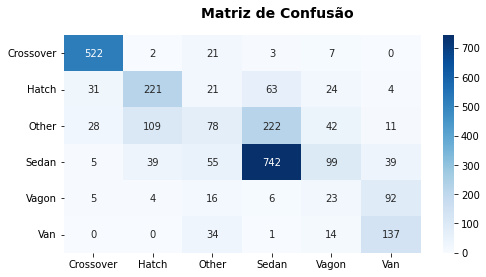

In [408]:
# 0 = 'crossover', 1 = 'hatch', 2 = 'other', 3 = 'sedan', 4 = 'vagon', 5 = 'van'


fig = plt.figure(figsize=(8,4))
fig.suptitle('Matriz de Confusão ', fontsize=14, fontweight='bold')
labels = ['Crossover', 'Hatch', 'Other', 'Sedan', 'Vagon', 'Van']
sns.heatmap(matriz,annot=True, fmt="d",cmap='Blues',xticklabels=labels, yticklabels= labels)